In [2]:
# Tratamiento de datos
# ==============================================================================
import warnings
import shap
from skforecast.utils import load_forecaster
from skforecast.utils import save_forecaster
from skforecast.preprocessing import RollingFeatures
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import TimeSeriesFold
from skforecast.direct import ForecasterDirect
from skforecast.recursive import ForecasterRecursive
import skforecast
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import sklearn
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg
from skforecast.datasets import fetch_dataset

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modelado y Forecasting
# ==============================================================================


# Configuración warnings
# ==============================================================================
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Versión skforecast: {skforecast.__version__}")
print(f"{color}Versión scikit-learn: {sklearn.__version__}")
print(f"{color}Versión pandas: {pd.__version__}")
print(f"{color}Versión numpy: {np.__version__}")

Versión skforecast: 0.15.1
Versión scikit-learn: 1.5.1
Versión pandas: 2.2.2
Versión numpy: 1.26.4


In [3]:
try:
    datos_ini = pd.read_csv("../output/Datos_Fusionadosv1.csv")


except Exception as e:
    print(f"Error al cargar los datos: {str(e)}")

In [4]:
datos  = datos_ini[datos_ini['ID_Equipo'] == 1]

In [6]:
datos.info()
datos.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1462
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_Equipo                    1463 non-null   int64  
 1   Fecha_Condiciones            1463 non-null   object 
 2   Temperatura_C                1463 non-null   float64
 3   Vibracion_mm_s               1463 non-null   float64
 4   Horas_Operativas             1463 non-null   int64  
 5   Horas_Recomendadas_Revision  1463 non-null   int64  
 6   Tipo_Mantenimiento           1463 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 91.4+ KB


,ID_Equipo,Fecha_Condiciones,Temperatura_C,Vibracion_mm_s,Horas_Operativas,Horas_Recomendadas_Revision,Tipo_Mantenimiento
0,1,2021-01-01,34.749896,2.136812,614,913,sin
1,1,2021-01-02,89.588937,9.409404,634,913,sin
2,1,2021-01-03,56.200558,1.529395,658,913,sin
3,1,2021-01-04,70.555608,3.411009,664,913,sin
4,1,2021-01-05,97.509000,0.618757,683,913,sin


C:\Users\UF775634\AppData\Local\Temp\ipykernel_27432\153222042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha_Condiciones'] = pd.to_datetime(datos['Fecha_Condiciones'])


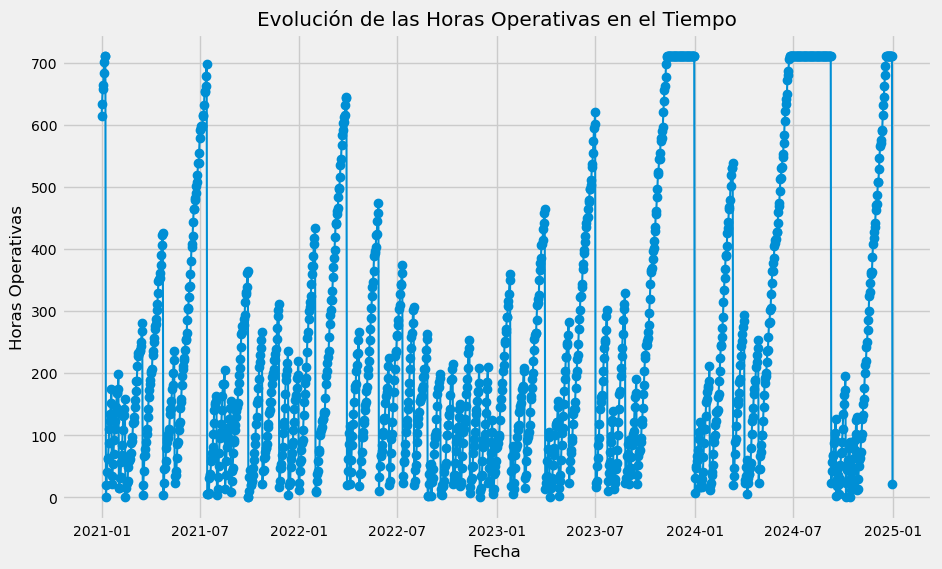

In [11]:



# Convertir la columna de fechas a tipo datetime
datos['Fecha_Condiciones'] = pd.to_datetime(datos['Fecha_Condiciones'])

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(datos['Fecha_Condiciones'], datos['Horas_Operativas'], marker='o')
plt.title('Evolución de las Horas Operativas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Horas Operativas')
plt.grid(True)
plt.show()
